# Heatmaps

In [2]:
import mgkit.plots
import numpy
import pandas
import seaborn as sns
import matplotlib.colors

/Users/francesco/dev/dev-env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Random matrix and color map init

In [3]:
nrow = 50
ncol = nrow

data = pandas.DataFrame(
{
    x: numpy.random.negative_binomial(500, 0.5, nrow)
    for x in xrange(ncol)
}
)

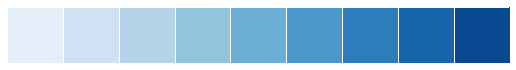

In [4]:
sns.palplot(sns.color_palette('Blues', 9))

In [5]:
cmap = matplotlib.colors.ListedColormap(sns.color_palette('Blues', 9))

## Basic plot

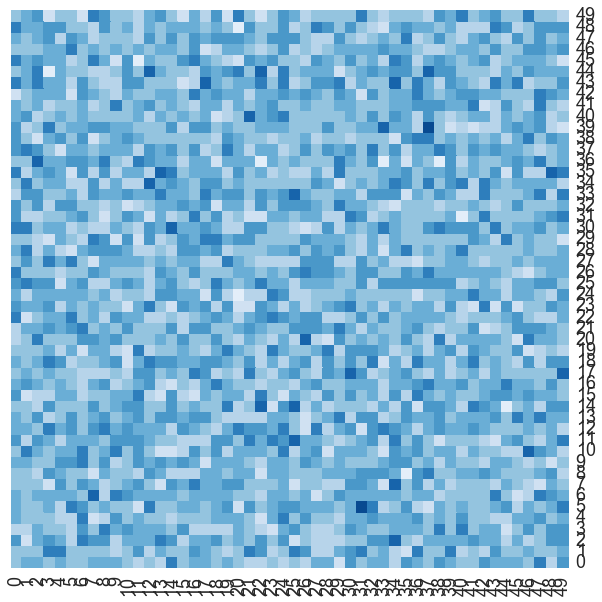

In [6]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10,10), aspect='equal')
mgkit.plots.heatmap.baseheatmap(data, ax, cmap=cmap)

## Add numbers to the heatmap

### Default

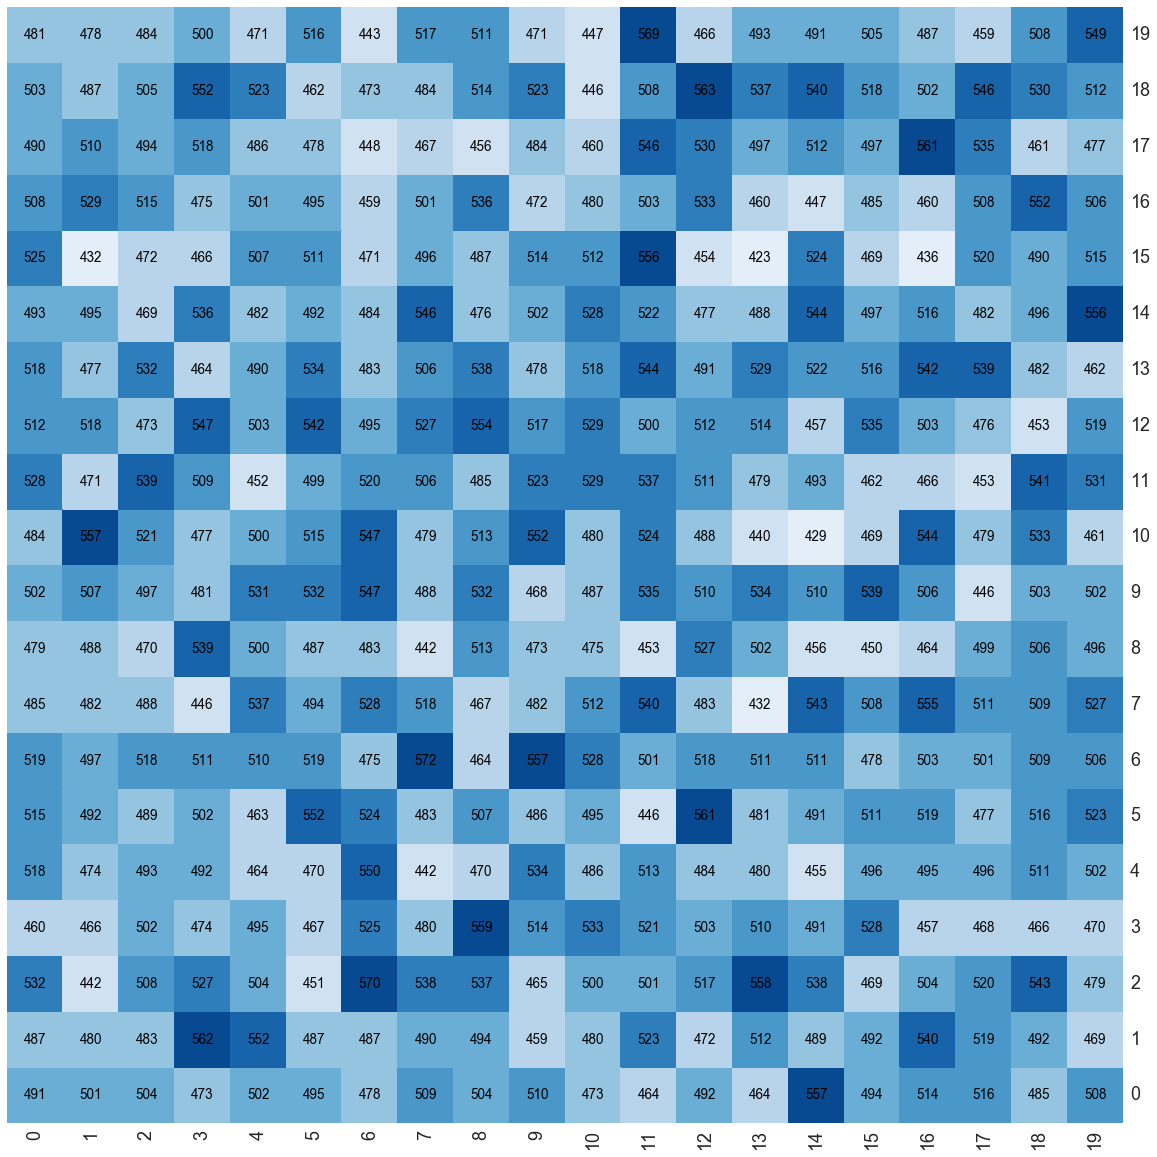

In [17]:
fig, ax = mgkit.plots.get_single_figure(figsize=(20,20))
mgkit.plots.heatmap.baseheatmap(data.iloc[:20, :20], ax, cmap=cmap, annot=True)

### Change format of numbers

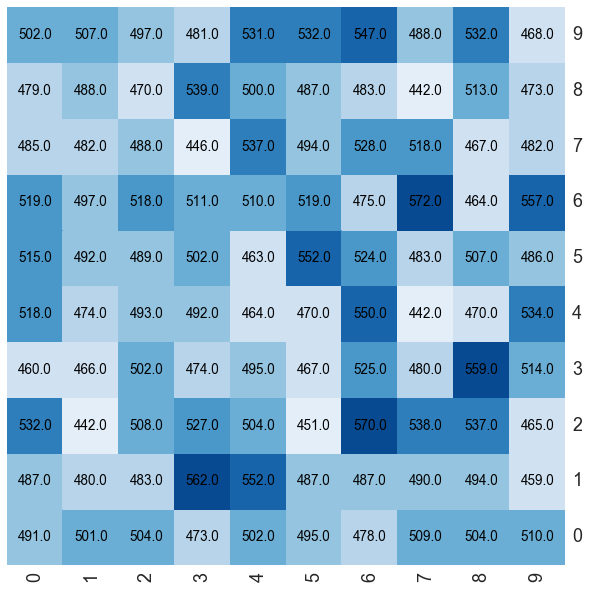

In [22]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10,10))
mgkit.plots.heatmap.baseheatmap(
    data.iloc[:10, :10], 
    ax, 
    cmap=cmap, 
    annot=True,
    annotopts=dict(format=lambda x: "{:.1f}".format(x))
)

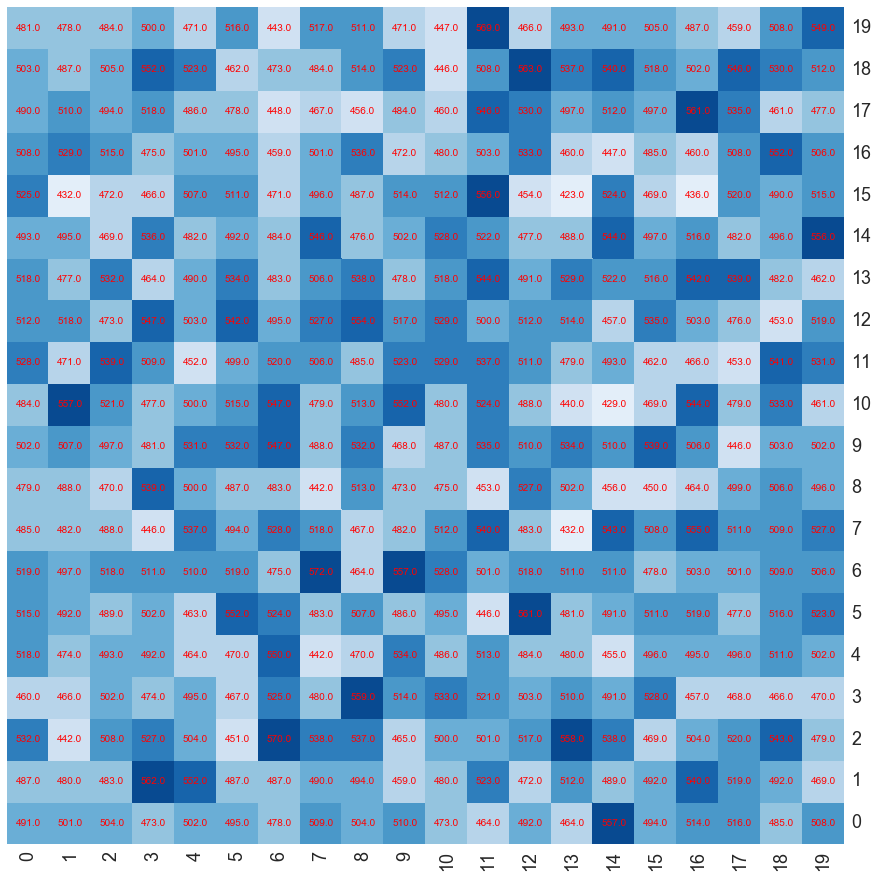

In [24]:
fig, ax = mgkit.plots.get_single_figure(figsize=(15,15))
mgkit.plots.heatmap.baseheatmap(
    data.iloc[:20, :20], 
    ax, 
    cmap=cmap, 
    annot=True,
    annotopts=dict(
        format=lambda x: "%.1f" % x,
        fontsize=10,
        color='r'
    )
)

## Using Boundaries for the colors

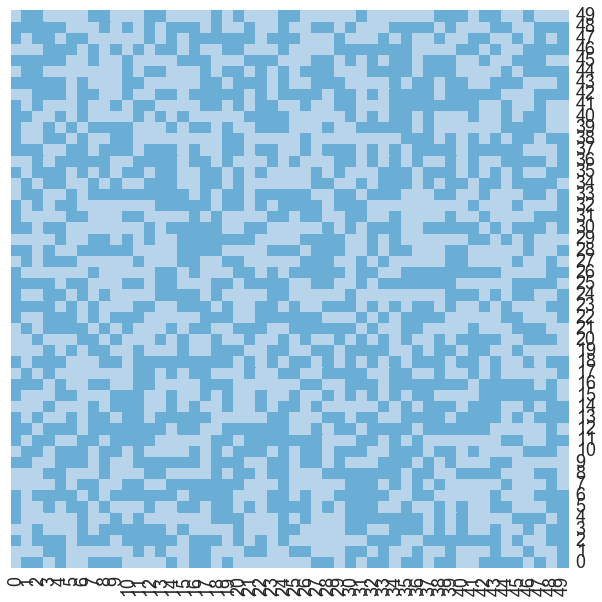

In [8]:
norm = matplotlib.colors.BoundaryNorm([0, 300, 500, 700, 900, 1000], cmap.N)

fig, ax = mgkit.plots.get_single_figure(figsize=(10,10), aspect='equal')
mgkit.plots.heatmap.baseheatmap(data, ax, cmap=cmap, norm=norm)

## Normalising the colors

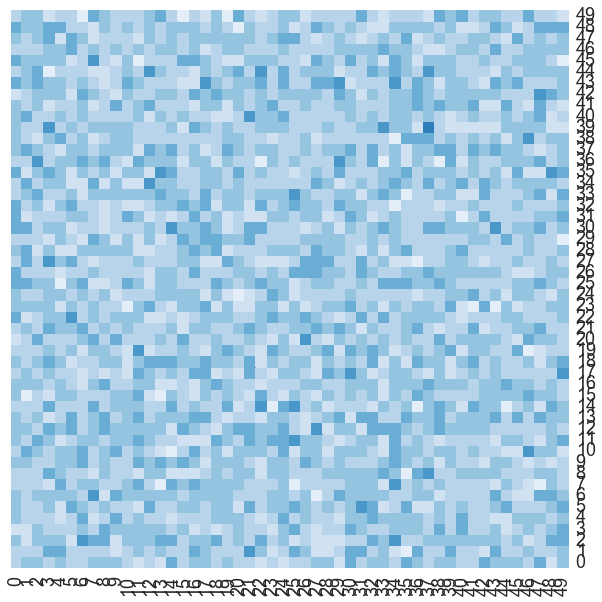

In [9]:
norm = matplotlib.colors.Normalize(vmin=400, vmax=700, clip=True)

fig, ax = mgkit.plots.get_single_figure(figsize=(10,10), aspect='equal')
mgkit.plots.heatmap.baseheatmap(data, ax, cmap=cmap, norm=norm)

### Grouping labels

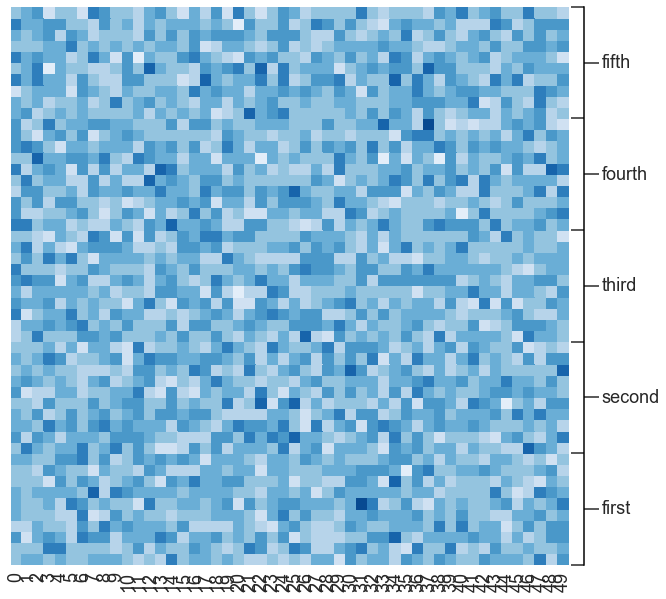

In [10]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10,10), aspect='equal')
mgkit.plots.heatmap.baseheatmap(data, ax, cmap=cmap)
mgkit.plots.grouped_spine(
    [range(10), range(10, 20), range(20, 30), range(30, 40), range(40, 50)], 
    ['first', 'second', 'third', 'fourth', 'fifth'],
    ax
)

### Reversing the order of the rows

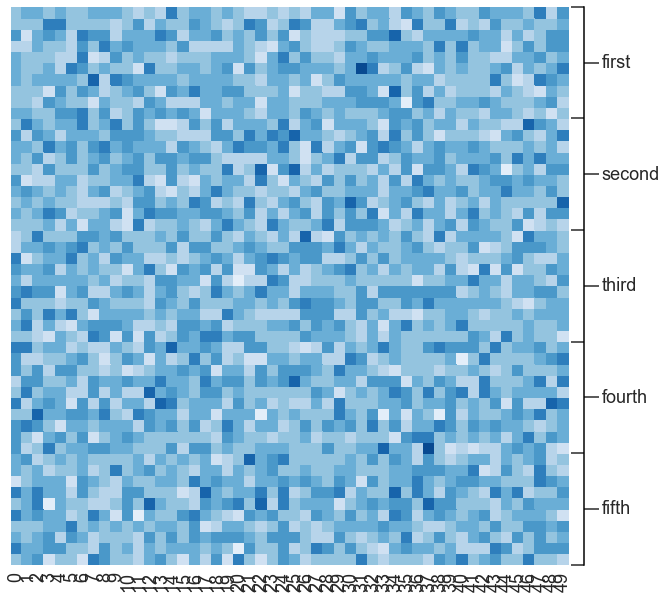

In [11]:
fig, ax = mgkit.plots.get_single_figure(figsize=(10,10), aspect='equal')
mgkit.plots.heatmap.baseheatmap(data.loc[data.index[::-1]], ax, cmap=cmap)
mgkit.plots.grouped_spine(
    [range(10), range(10, 20), range(20, 30), range(30, 40), range(40, 50)][::-1], 
    ['first', 'second', 'third', 'fourth', 'fifth'][::-1],
    ax
)

## A dendrogram from clustering the data 

### Clustering rows

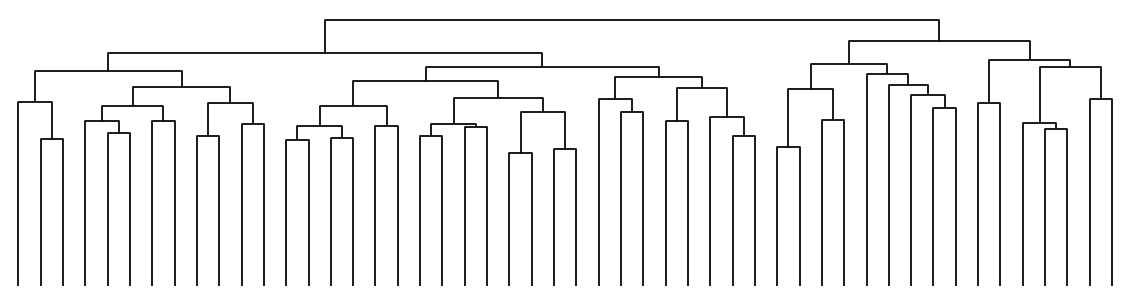

In [12]:
fig, ax = mgkit.plots.get_single_figure(figsize=(20, 5))
_ = mgkit.plots.heatmap.dendrogram(data, ax)

### Clustering colums (You need the transposed matrix)

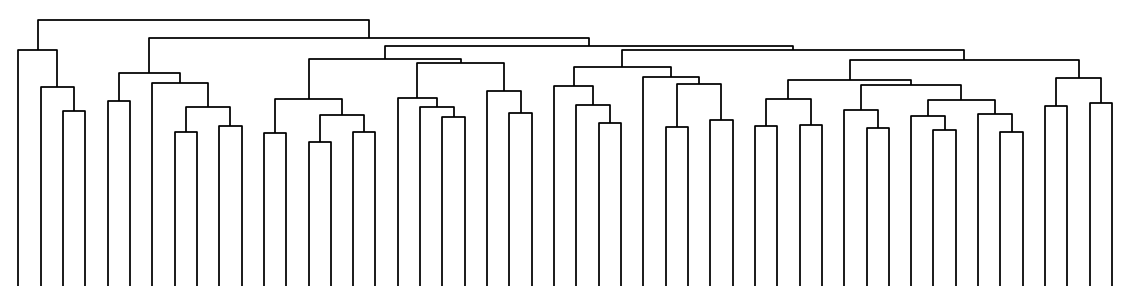

In [13]:
fig, ax = mgkit.plots.get_single_figure(figsize=(20, 5))
_ = mgkit.plots.heatmap.dendrogram(data.T, ax)

## A simple clustered heatmap, look at the code for customisation

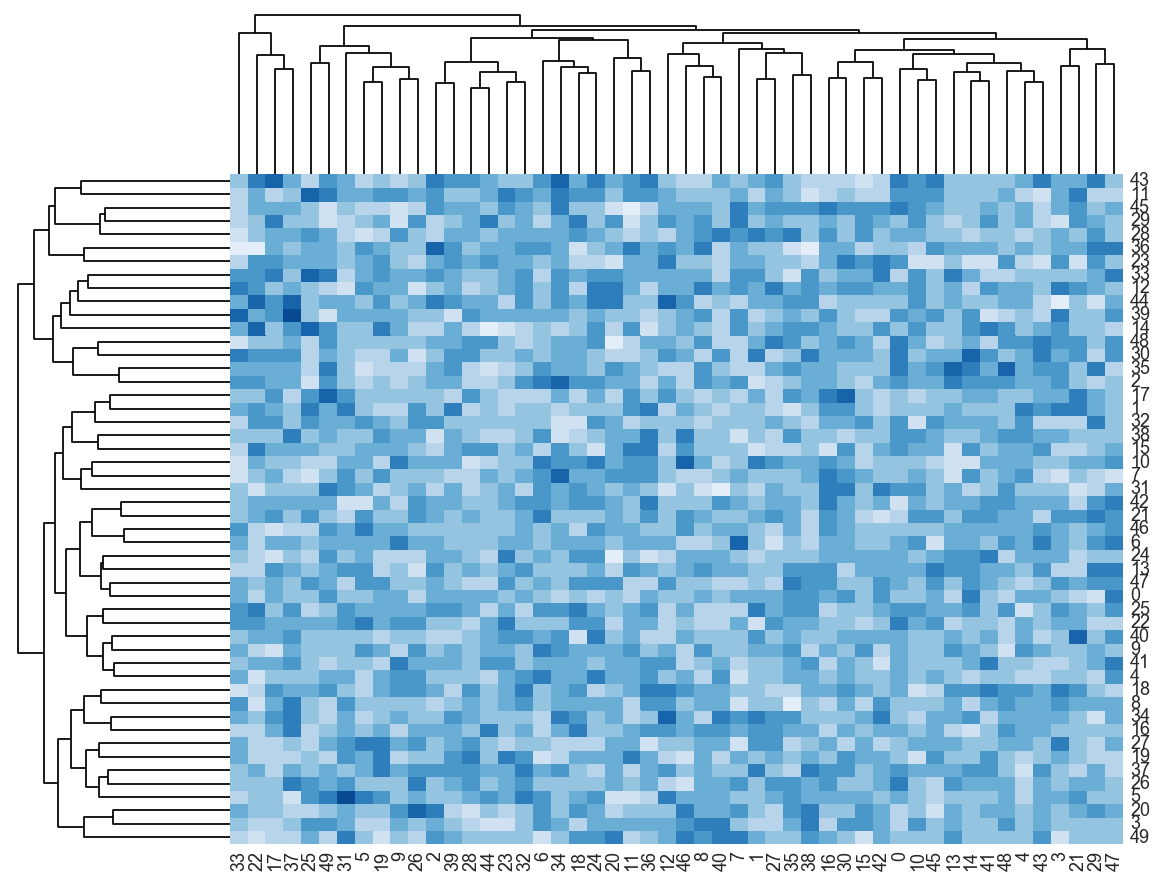

In [14]:
mgkit.plots.heatmap.heatmap_clustered(data, figsize=(20, 15), cmap=cmap)